## CS4243 Lab 3: Feature Matching and Applications

**ASSIGNMENT SUBMISSION DEADLINE: 29.10 23:59**
- The functions to be implemented are given in `lab3.py`, along with the instructions for each function. You need to fill in the codes which start with `# YOUR CODE HERE` and end with `# END`
- The test images are given in folder `data/input` and sample outputs are provided in `data/output`
- Most of these functions are available in build-in libraries, but you are not allowed to use them in this assignment except for `numpy`. Exceptions will be explicitly stated.

**Attention**:
- Please use python with version >= 3.8.4, and install the libs provided in requirements.txt via 'pip install -r requirements.txt'.
- Please do not change the inputs arguments of the functions in transform.py, otherwise your implementation would fail to pass the test.
- After you implement one function, you may have to restart the notebook kernel to help it recognize your fresh code.
- Please do not change the structure of files in the whole folder of this assignment, otherwise TA may mark your code wrongly.
- The functions in `utils.py` are to help us and should not have to be changed. Nonetheless, feel free to make adjustments if there are issues on your end.

**SUBMISSION INSTRUCTIONS:**

After you finish the code and get all the results: 

   1. re-run this notebook (and make sure you get all the clean outputs), 
    
   2. zip the same folder back and name it with your student ID (e.g. A0123456H.zip or A0123456H_A2345678J.zip if you are a group of 2), and 
    
   3. submit to the NUS Luminus system. Please be careful since any failure to follow the submission guideline will result in a grade deduction.
    
If you have any question regarding this lab, do not hesistate to ask questions under the Lab section on LumiNUS forum. You can also attend the any lab slot for FAQs.

There are **FOUR parts** for this lab (35+25+25+15). 

In [1]:
import numpy as np
from skimage import filters
from skimage.feature import corner_peaks
import matplotlib.pyplot as plt
import cv2

In [2]:
from lab3 import *
from utils import *
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

**Part 1: Keypoint Detection, Description, and Matching (35%)**

**1.1 Keypoint detection** (5%)

We will start by implementing a simple detector.

**Goal**: Implement `harris_corners` function and then run the code cells below.

Hint: You may use the function `scipy.ndimage.filters.convolve`, which is already imported.

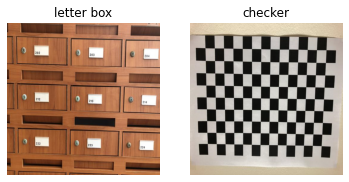

In [3]:
# Before working on the corner detectors, let's see what the original images look like
plt.subplot(1,2,1)
plt.imshow(cv2_imread('data/input/letterbox.png'))
plt.axis('off')
plt.title('letter box')

plt.subplot(1,2,2)
plt.imshow(cv2_imread('data/input/checker.png'))
plt.axis('off')
plt.title('checker')
plt.show()

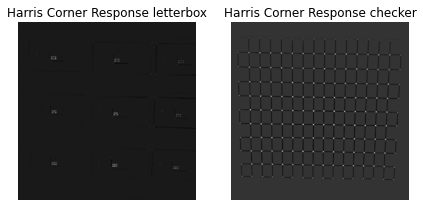

In [4]:
img1 = cv2.imread('data/input/letterbox.png', 0)
img2 = cv2.imread('data/input/checker.png', 0)

# Compute Harris corner response
response1 = harris_corners(img1)
response2 = harris_corners(img2)

# Display corner response
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.imshow(response1, cmap='gray')
plt.axis('off')
plt.title('Harris Corner Response letterbox')


plt.subplot(1,2,2)
plt.imshow(response2, cmap='gray')
plt.axis('off')
plt.title('Harris Corner Response checker')
plt.show()

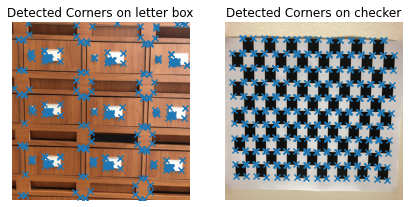

In [5]:
# Perform non-maximum suppression in response map
# and output corner coordiantes
corners1 = corner_peaks(response1, threshold_rel=0.01)
corners2 = corner_peaks(response2, threshold_rel=0.01)

# Display detected corners
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.imshow(cv2_imread('data/input/letterbox.png'))
plt.scatter(corners1[:,1], corners1[:,0], marker='x')
plt.axis('off')
plt.title('Detected Corners on letter box')

plt.subplot(1,2,2)
plt.imshow(cv2_imread('data/input/checker.png'))
plt.scatter(corners2[:,1], corners2[:,0], marker='x')
plt.axis('off')
plt.title('Detected Corners on checker')
plt.show()

Now, let's test our keypoint detector on an image of a box and its rotated version.

**NOTE**: Don't remove the commented codes.

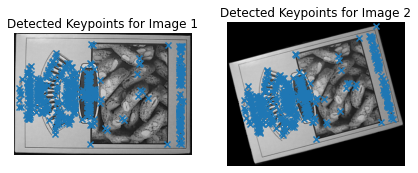

In [6]:
img1 = cv2.imread('data/input/box.png', 0)
img2 = cv2.imread('data/input/box_rotated.png', 0)
img1_c = cv2_imread('data/input/box.png')
img2_c = cv2_imread('data/input/box_rotated.png')

# Uncomment the four lines below later (COME BACK WHEN YOU REACH THE EXPLORATORY SECTION)
# img1 = cv2.imread('data/input/box.png', 0)
# img2 = cv2.imread('data/input/box_upright.png', 0)
# img1_c = cv2_imread('data/input/box.png')
# img2_c = cv2_imread('data/input/box_upright.png')

# Detect keypoints in two images
keypoints1 = corner_peaks(harris_corners(img1, window_size=3),
                          threshold_rel=0.05,
                          exclude_border=8)
keypoints2 = corner_peaks(harris_corners(img2, window_size=3),
                          threshold_rel=0.05,
                          exclude_border=8)

# Display detected keypoints
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.imshow(img1_c)
plt.scatter(keypoints1[:,1], keypoints1[:,0], marker='x')
plt.axis('off')
plt.title('Detected Keypoints for Image 1')

plt.subplot(1,2,2)
plt.imshow(img2_c)
plt.scatter(keypoints2[:,1], keypoints2[:,0], marker='x')
plt.axis('off')
plt.title('Detected Keypoints for Image 2')
plt.show()

**1.2 Keypoint description** (15%)

After we are able to identify the keypoints, we will move on to the next part: describing these keypoints.

**Goal**: Implement the `naive_descriptor` and `simple_sift` functions before proceeding to the next section. 

We provide you the function `describe_keypoints` which takes as argument an image, a list of keypoints on that image, a descriptor function, and patch size. For each keypoint on the image, a region equal to patch size will be extracted, and the descriptor function is used to describe that region. 

**1.3 Keypoint matching** (5%)


**Goal**: Implement `top_k_matches` and `ratio_test_match`.

Next, let's see our descriptors and "matcher" in action.

In [7]:
# Don't change this
NAIVE_DESC_PATCH_SIZE = 5
SIMPLE_SIFT_PATCH_SIZE = 16

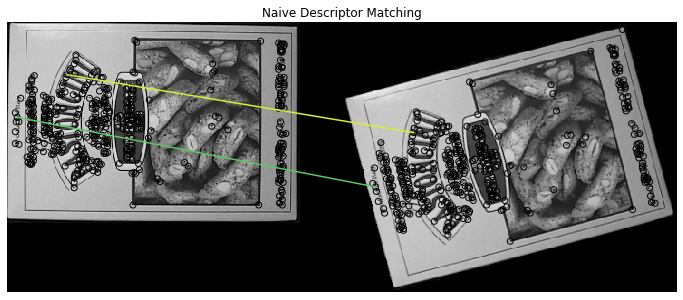

In [8]:
# Extract features from the corners
desc1 = describe_keypoints(img1, keypoints1,
                           desc_func=naive_descriptor,
                           patch_size=NAIVE_DESC_PATCH_SIZE)
desc2 = describe_keypoints(img2, keypoints2,
                           desc_func=naive_descriptor,
                           patch_size=NAIVE_DESC_PATCH_SIZE)

# Match descriptors in image1 to those in image2

match_threshold = 0.5
# match_threshold = 0.8
matches = ratio_test_match(desc1, desc2, match_threshold)

# Plot matches
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
ax.axis('off')
plot_matches(ax, img1_c, img2_c, keypoints1, keypoints2, matches)
plt.title("Naive Descriptor Matching")
plt.show()



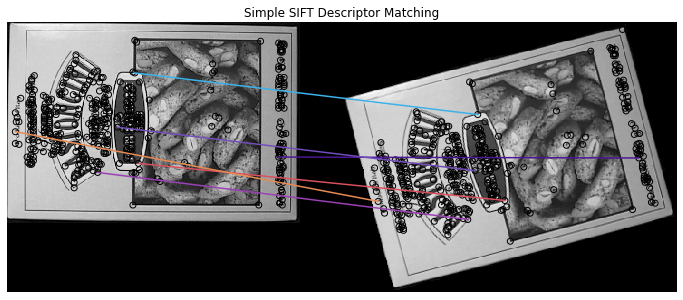

In [9]:
# Detect keypoints in both images
keypoints1 = corner_peaks(harris_corners(img1, window_size=3),
                          threshold_rel=0.05,
                          exclude_border=8)
keypoints2 = corner_peaks(harris_corners(img2, window_size=3),
                          threshold_rel=0.05,
                          exclude_border=8)

# Extract features from the corners
desc1 = describe_keypoints(img1, keypoints1,
                           desc_func=simple_sift,
                           patch_size=SIMPLE_SIFT_PATCH_SIZE)
desc2 = describe_keypoints(img2, keypoints2,
                           desc_func=simple_sift,
                           patch_size=SIMPLE_SIFT_PATCH_SIZE)

# Match descriptors in image1 to those in image2
match_threshold = 0.5
# match_threshold = 0.85
matches = ratio_test_match(desc1, desc2, match_threshold)

# Plot matches
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
ax.axis('off')
plot_matches(ax, img1, img2, keypoints1, keypoints2, matches)
plt.title("Simple SIFT Descriptor Matching")
plt.show()

**EXPLORATORY SECTION** : Where are the good matches? (10%)

**Question 1**: Discuss the trade-off between accepting false matches and rejecting correct matches. How does adjusting the 
match threshold (for ratio test) affect this?

**Answer**: Accepting false matches causes the matching process to match 2 keypoints that are not the same, while rejecting correct matches causes the matching process to miss out on potential keypoint matches. The tradeoff is that accepting false matches more will produce more keypoint matches overall, with each match being less accurate while rejecting correct matches will produce less keypoint matches overall, but each match is more accurate. If the accuracy of the matches is more desireble, then some rejection of correct matches may be prefered. If having more matches to work with is more desireble, then accepting some false matches may be prefered. 

Increasing the match threshold for ratio test will increase the number of false matches that are accepted and decrease the number of correct matches that are rejected. When the ratio is large (closer to 1), it means that the top 2 nearest keypoints are more similar in distance, so either keypoint could be the correct match as they are both near. At the same time, it could mean that both keypoints are far, so neither is a match, but a high match threshold will accept the match regardless.

**Question 2**: Compare the matching results that you get using `simple_descriptor` vs `sift_descriptor`. Increase the value for `match_threshold` and rerun the cells. What do you observe? 
    
**Answer**: The matching results for `sift_descriptor` is better than the result for `simple_descriptor`. This can be seen by the number of parallel lines in the matching result. Increasing the value for `match_threshold` increases the overall number of matches, but also increases the number of false matches.

**Question 3**: Remember the cell with commented codes? Uncomment those lines to run the describing and matching process again, using your two descriptors. In this case, the angle of rotation between the two images is 90 degree. What happens to your matching result using the simple SIFT descriptors this time? Suggest a reason. 

Also suggest ONE possible change that can be made to improve your SIFT version. 

**Answer**: The matching result using the simple SIFT descriptors produces much fewer matching results overall, with almost all the of the matches being false matches. This is likely because the 90 degree rotated image will have gradient orientations that are swapped. Since the simple SIFT descriptor uses the histogram of oriented gradients as the features, the same keypoint in each image will produce very different histograms, resulting in different feature vectors that will not be similar.

The simple SIFT descriptor can be changed to be more rotation invariant by using a histogram of oriented gradients that is relative to the orientation of the keypoint. The orientation of the keypoint can be found using the bin with most votes in the histogram of oriented gradients. Then, recalculate the histogram by subtracting the orientation of the keypoint, so the histogram is now relative to the keypoint's orientation.

**PART 2: IMAGE STITCHING (25%)**

In this task, we will look at an interesting topic: fingerprint stitching, which is related to fingerprint matching. Traditional fingerprint matching relies on large-scaled features called minutiae. With the development in sensor technology, however, we are not spoilt with full fingerprint images. As a result, matching can be done using small-sized features like SIFT. 

First, use your `simple_sift` descriptor on two images: `fp1.png` and `fp2.png`. These two are segments cut from a full fingerprint image and overlap with one another. They are known as partial fingerprints.


**Test case 1**: Easy match (2%) 

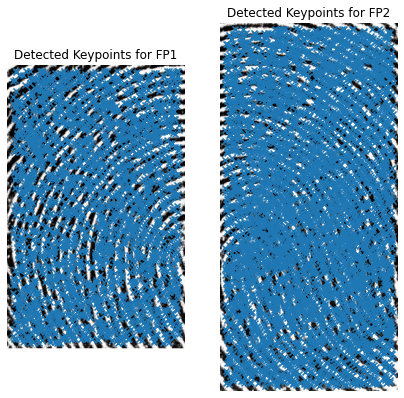

In [10]:
img1 = cv2.imread('data/input/fp1.png', 0)
img2 = cv2.imread('data/input/fp2.png', 0)

img1_c = cv2_imread('data/input/fp1.png')
img2_c = cv2_imread('data/input/fp2.png')

# Detect keypoints in two images
keypoints1 = corner_peaks(harris_corners(img1, window_size=3),
                          threshold_rel=0.05,
                          exclude_border=8)
keypoints2 = corner_peaks(harris_corners(img2, window_size=3),
                          threshold_rel=0.05,
                          exclude_border=8)

# Display detected keypoints
_ = plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.imshow(img1_c)
plt.scatter(keypoints1[:,1], keypoints1[:,0], marker='x')
plt.axis('off')
plt.title('Detected Keypoints for FP1')

plt.subplot(1,2,2)
plt.imshow(img2_c)
plt.scatter(keypoints2[:,1], keypoints2[:,0], marker='x')
plt.axis('off')
plt.title('Detected Keypoints for FP2')
plt.show()

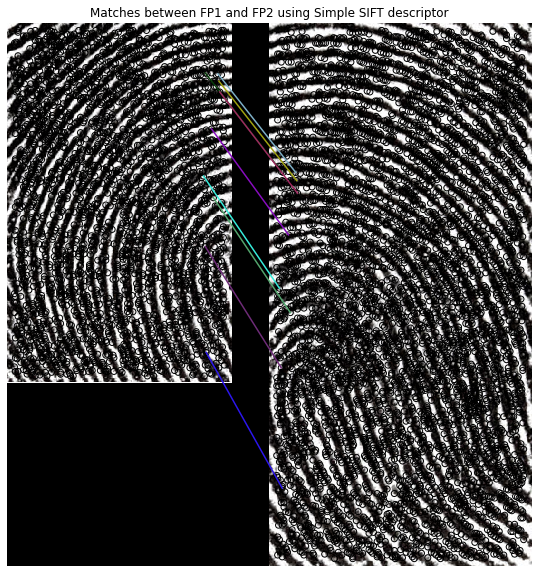

In [11]:
# Extract features from the corners
desc1 = describe_keypoints(img1, keypoints1,
                           desc_func=simple_sift,
                           patch_size=SIMPLE_SIFT_PATCH_SIZE)
desc2 = describe_keypoints(img2, keypoints2,
                           desc_func=simple_sift,
                           patch_size=SIMPLE_SIFT_PATCH_SIZE)

# Match descriptors in image1 to those in image2
# Feel free to change match_threshold, but keep the value to between 0.5-0.8
match_threshold = 0.5
matches = ratio_test_match(desc1, desc2, match_threshold)

# Plot matches
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.axis('off')
plot_matches(ax, img1_c, img2_c, keypoints1, keypoints2, matches)
plt.title('Matches between FP1 and FP2 using Simple SIFT descriptor')
plt.show()


**2.1 Image stitching using homography** (10%)

**Goal** Implement the function `compute_homography`. 

##### Now let's see our stitching result.
(for this part, you may want to set `match_threshold` to 0.5)

[[ 7.02471965e-01 -4.54080611e-03  6.45844844e+01]
 [-6.58197159e-04  6.97609692e-01 -1.44530830e+02]
 [-6.61723067e-06 -2.20016411e-05  6.28489753e-01]]


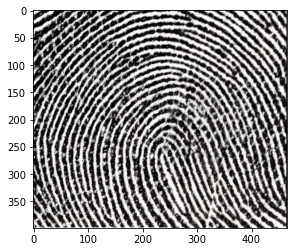

In [12]:
# Extract matched keypoints
match_threshold = 0.5
p1 = keypoints1[matches[:,0]]
p2 = keypoints2[matches[:,1]]

# Compute Homography matrix H that maps p2 to p1
H = compute_homography(p1, p2)

print(H)

final_im = trim(warp_image(img1_c, img2_c, H))
plt.imshow(final_im)

Expected answer:

<img src='data/output/fp1_2.png' width="300" height="300">

**2.2 RANSAC** (10%)

**Question**: change the `match_threshold` to 0.75 and run the cell above again. Is the stitching still accurate ? If not, what do you think is the reason?

**Answer**:

Sometimes, the luxury of being able to use a low threshold does not belong to us and we face outliers. In this case, we can use RANSAC to pick out the inliers, following the algorithm taught in the lecture.

**Goal** Implement the function `ransac_homography`. 

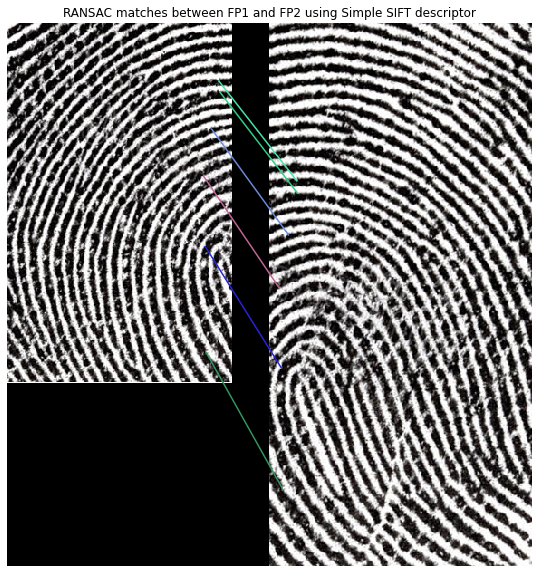

In [13]:
# You can tune sampling_ratio, n_iters, and threshold
H, robust_matches = ransac_homography(keypoints1, keypoints2, matches, sampling_ratio=0.7, n_iters=10000, delta=3000)

# Visualize robust matches
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.axis('off')
plot_matches(ax, img1_c, img2_c, keypoints1, keypoints2, robust_matches, only_matches=True)
plt.title('RANSAC matches between FP1 and FP2 using Simple SIFT descriptor')
plt.show()


Let see the stitching result with RANSAC's help.

(Here you may want to change the value for `sampling_ratio` and `delta`, or just simply run the cell above again. It's fine if your answer is not perfect as when `match_threshold` was 0.5. Being close is good enough.)

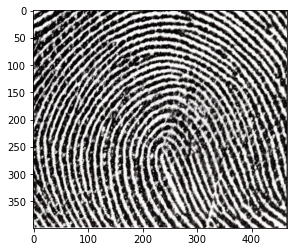

In [14]:
final_im = trim(warp_image(img1_c, img2_c, H))
plt.imshow(final_im)

Expected answer:

<img src='data/output/fp1_2_ransac.png' width="300" height="300">

**Test case 2**: Harder match (3%)

Now, let's look at a harder example, where replace the second image with `fp3.png`. This is also cut from the same fingerprint image, but drastically rotated from the original orientation.

**Question**: Run the cell below and observe the matching results. Do you see any match when `match_threshold` is 0.7? If yes, are the matches accurate? 

Increase the `match_threshold` to 0.85. What do you observe now? Do you think that the matches displayed are good? How would they affect the stitching result? Try and see if RANSAC can help here.

**Answer**:

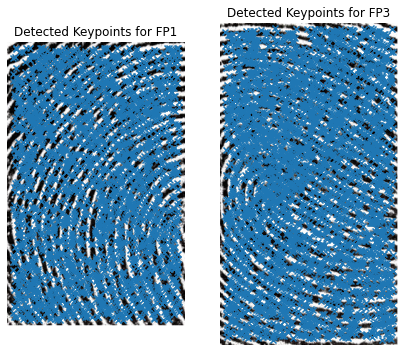

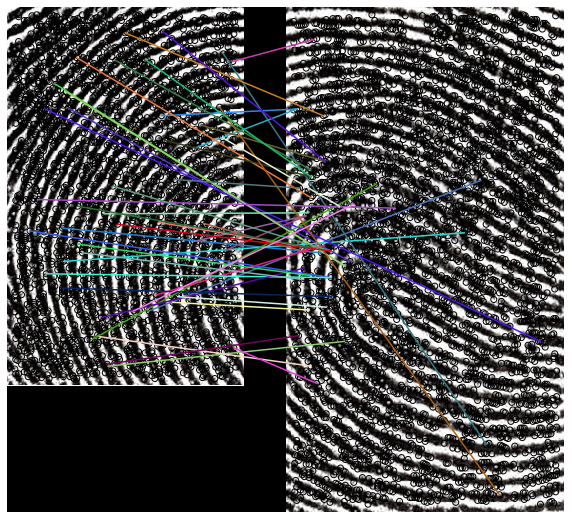

In [15]:
img1 = cv2.imread('data/input/fp1.png', 0)
img2 = cv2.imread('data/input/fp3.png', 0)

img1_c = cv2_imread('data/input/fp1.png')
img2_c = cv2_imread('data/input/fp3.png')

# Detect keypoints in two images
keypoints1 = corner_peaks(harris_corners(img1, window_size=3),
                          threshold_rel=0.05,
                          exclude_border=8)
keypoints2 = corner_peaks(harris_corners(img2, window_size=3),
                          threshold_rel=0.05,
                          exclude_border=8)

# Display detected keypoints
_ = plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.imshow(img1_c)
plt.scatter(keypoints1[:,1], keypoints1[:,0], marker='x')
plt.axis('off')
plt.title('Detected Keypoints for FP1')

plt.subplot(1,2,2)
plt.imshow(img2_c)
plt.scatter(keypoints2[:,1], keypoints2[:,0], marker='x')
plt.axis('off')
plt.title('Detected Keypoints for FP3')
plt.show()

# Extract features from the corners
desc1 = describe_keypoints(img1, keypoints1,
                           desc_func=simple_sift,
                           patch_size=SIMPLE_SIFT_PATCH_SIZE)
desc2 = describe_keypoints(img2, keypoints2,
                           desc_func=simple_sift,
                           patch_size=SIMPLE_SIFT_PATCH_SIZE)


# Match descriptors in image1 to those in image2
match_threshold = 0.7
matches = ratio_test_match(desc1, desc2, match_threshold)

# Plot matches
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.axis('off')
plot_matches(ax, img1_c, img2_c, keypoints1, keypoints2, matches)
plt.show()

We provide you with a function `compute_cv2_descriptor`, which both detects and describes keypoints on an image.
It also returns angles and sizes for the keypoints. A keypoint angle is the dominant orientation for that keypoint (do note that it is measured w.r.t to the x-axis, aka the "column" axis according to our convention). A keypoint size is the size for the keypoint; different keypoints do not need to have the same size.

You may notice that some keypoints have the same coordinates. As per the original paper, a new keypoint is created if there are more than one dominant orientation.

Let's see how this descriptor fare against our test case:

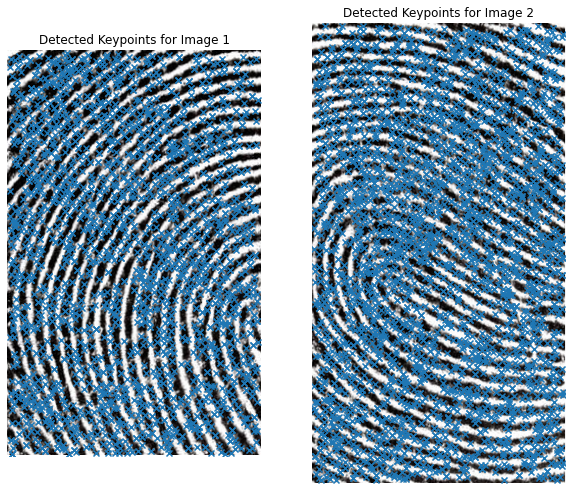

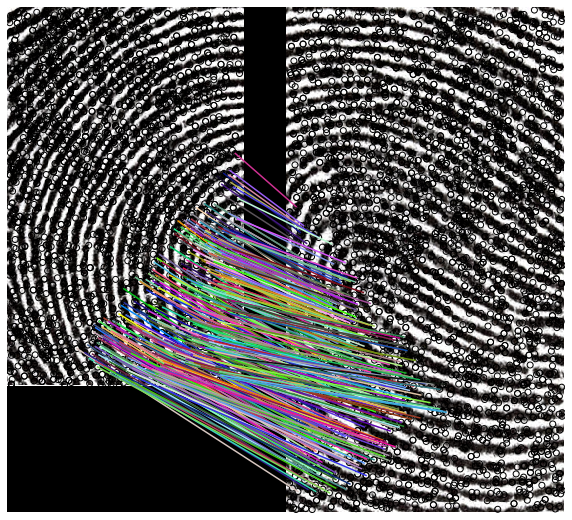

In [16]:
keypoints1, desc1, _, _ = compute_cv2_descriptor(img1_c)
keypoints2, desc2, _, _ = compute_cv2_descriptor(img2_c)

_ = plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img1_c)
plt.scatter(keypoints1[:,1], keypoints1[:,0], marker='x')
plt.axis('off')
plt.title('Detected Keypoints for Image 1')

plt.subplot(1,2,2)
plt.imshow(img2_c)
plt.scatter(keypoints2[:,1], keypoints2[:,0], marker='x')
plt.axis('off')
plt.title('Detected Keypoints for Image 2')
plt.show()

# Match descriptors in image1 to those in image2

match_threshold = 0.6
matches = ratio_test_match(desc1, desc2, match_threshold)

# Plot matches
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.axis('off')
plot_matches(ax, img1_c, img2_c, keypoints1, keypoints2, matches)
plt.show()

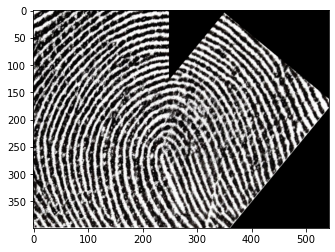

In [17]:
# You can run this cell after matching using the simple_sift, but the result is likely not good
# Extract matched keypoints
p1 = keypoints1[matches[:,0]]
p2 = keypoints2[matches[:,1]]

# Compute Homography matrix H that maps p2 to p1
H = compute_homography(p1, p2)

final_im = trim(warp_image(img1_c, img2_c, H))
plt.imshow(final_im)

Expected answer:

<img src='data/output/fp1_3_cv2SIFT.png' width="350" height="300">

In part 3 and 4, we will do some simple detection of mirror symmetry and rotational symmetry, following the method detailed in the paper "[Detecting Symmetry and Symmetric Constellations of Features](http://www.cse.psu.edu/~yul11/CourseFall2006_files/loy_eccv2006.pdf)" (Loy and Eklundh, 2006). The described method leverages matching of feature points; each match pair is used to generate a parameter point that defines either the reflection line or the center of rotation, depending on the case of symmetry. Hough Voting, the technique that you have learnt and experimented with for lab 2, will be used as well.

**PART 3: MIRROR SYMMETRY DETECTION (25%)**
   
We provide three functions for you: `angle_with_x_axis`, `midpoint`, and `distance`.

**Test case 1**: Vertical line of symmetry (1%)

First, let's look at the image of a lamp and its mirrored version (over the vertical-axis):

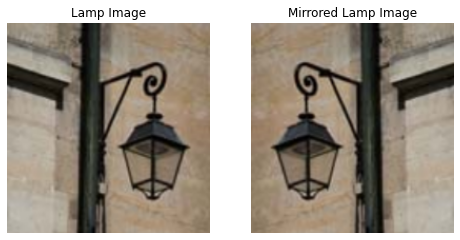

In [18]:
lamp_path = "data/input/lamp.png"
lamp_im = cv2.imread(lamp_path, 0)

mirror_lamp_im = np.fliplr(lamp_im)

lamp_im_c = cv2_imread(lamp_path)
m_lamp_im_c = np.fliplr(lamp_im_c)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(lamp_im_c)
plt.axis('off')
plt.title('Lamp Image')

plt.subplot(1,2,2)
plt.imshow(m_lamp_im_c)

plt.axis('off')
plt.title('Mirrored Lamp Image')
plt.show()

**3.1 Generate descriptors and mirror descriptors for the images** (5%)

**Goal**: Implement the functions `shift_sift_descriptors` and use it to implement `create_mirror_descriptors`.

Hint: refer to `lab3.py`. You may also want to use the `compute_cv2_descriptor` function on the flipped version of an image (using `np.fliplr`) and observe how the histogram changes.

**3.2 Match keypoints from an image and the virtual descriptors** (5%)


**Goal**: Implement the function `match_mirror_descriptors`. 

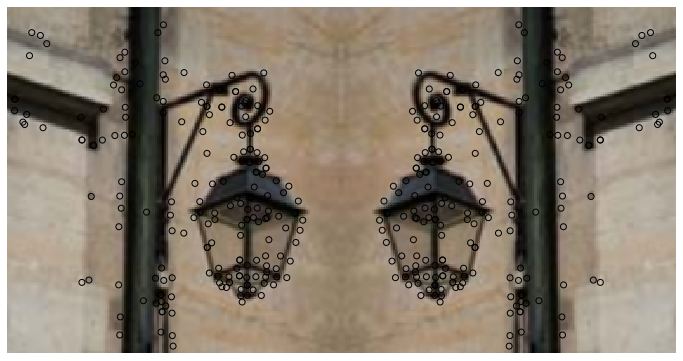

In [72]:
kps, descs, sizes, angles, mir_descs = create_mirror_descriptors(lamp_im)
matches = match_mirror_descriptors(descs, mir_descs)
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
ax.axis('off')
plot_mirror_matches(ax, lamp_im_c, kps, matches) 
plt.show()

**3.3 Generate symmetry line parameters** (5%)

After collecting the pairs of matched keypoints from the previous step, we will make use of the point coordinates for each pair to vote for ρ and θ in a 2D Hough space.

**Goal**: Implement `find_symmetry_lines`. Use this function to implement the next one.

**3.4 Perform Hough voting for mirror line** (5%)

**Goal**: Implement `hough_vote_mirror`. 

Hint: the function `find_peak_params` is provided for you. Note that this function have two parameters `window`, `threshold` that can be adjusted.

In [69]:
rhos, thetas = hough_vote_mirror(matches, kps, lamp_im.shape, window=1, threshold=0.5, num_lines=1)
draw_mirror_line(lamp_im_c.copy() , rhos, thetas)

[[73  0]]
[[ 59.90109634   4.27458334]
 [ 53.17337418   4.45818901]
 [ 53.17337418   4.45818901]
 [ 66.44650269   9.05280781]
 [ 67.79694366  10.07073212]
 [ 62.01428986  11.2409296 ]
 [ 28.14679718  12.86493587]
 [ 14.84306622  14.14839935]
 [ 16.50312424  19.10930443]
 [ 69.6815567   20.6543541 ]
 [ 21.23079109  22.80572701]
 [ 63.6190834   42.45587158]
 [158.83076477  43.07770538]
 [ 76.73522186  43.09746933]
 [ 76.73522186  43.09746933]
 [157.50364685  47.12459564]
 [109.28410339  48.42683792]
 [ 79.89173126  49.73315811]
 [ 79.89173126  49.73315811]
 [ 76.7831955   54.87303925]
 [ 58.91455078  55.509758  ]
 [ 45.06726456  61.31196976]
 [ 74.17303467  62.06952667]
 [ 40.81952286  63.09843063]
 [160.27928162  64.27313995]
 [126.74728394  64.37327576]
 [189.16477966  64.88415527]
 [109.08827209  64.9071579 ]
 [ 29.28512955  65.04489899]
 [178.75163269  65.23869324]
 [116.07597351  65.73600006]
 [ 47.8240242   65.98349762]
 [100.83427429  65.98434448]
 [ 74.04868317  67.60413361]
 [ 3

NameError: name 'rho_values' is not defined

Expected answer:

<img src='data/output/lamp.png' width="200" height="200">

Now, we will take on a more difficult example.

**Test case 2**: Kick-me some challenge (2%)

In [ ]:
mickey_path = "data/input/mickey.png"
mickey_im = cv2.imread(mickey_path, 0)
mickey_im_c = cv2_imread(mickey_path)

mickey_kps, mickey_descs, _, _, mirr_mickey_descs = create_mirror_descriptors(mickey_im_c)



mickey_matches = match_mirror_descriptors(mickey_descs, mirr_mickey_descs, threshold=0.7)



fig, ax = plt.subplots(1, 1, figsize=(12, 9))
ax.axis('off')
plot_mirror_matches(ax, mickey_im_c, mickey_kps, mickey_matches)
plt.show()

In [ ]:
rhos, thetas = hough_vote_mirror(mickey_matches, mickey_kps, mickey_im.shape,  num_lines=1)
draw_mirror_line(mickey_im_c.copy() , rhos, thetas)

Expected answer:

<img src='data/output/kickme.png' width="200" height="200">

An even more complicated example

**Test case 3**: Multiple lines? (2%)

Please note that for this test case you may want to play around with the parameters `window`, `threshold`, and most importantly `num_lines`.

In [ ]:
path = "data/input/meta.png"
im = cv2.imread(path, 0)
mirror_im = np.fliplr(im)

im_c = cv2_imread(path)
m_im_c = np.fliplr(im_c)

plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.imshow(im_c)
plt.axis('off')
plt.title('Meta Cover Image')

plt.subplot(1,2,2)
plt.imshow(m_im_c)

plt.axis('off')
plt.title('Mirrored Meta Cover Image')
plt.show()

In [ ]:
kps, descs, _, _, mir_descs = create_mirror_descriptors(im)
matches = match_mirror_descriptors(descs, mir_descs)
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.axis('off')
plot_mirror_matches(ax, im_c, kps, matches)
plt.show()

In [ ]:
rhos, thetas = hough_vote_mirror(matches, kps, im.shape, window=6, threshold=0.3, num_lines=3)
draw_mirror_line(im_c.copy() , rhos, thetas)

Expected answer:

<img src='data/output/cover.png' width="200" height="200">

**PART 4: ROTATION SYMMETRY DETECTION (15%)**

Now, let's tackle rotational symmetry detection. 

**Test case 1**: Simple reactor (1%)

In [ ]:
path = "data/input/reactor.png"
im = cv2.imread(path, 0)
im_c = cv2_imread(path)


plt.figure(figsize=(4,4))
plt.imshow(im_c)
plt.axis('off')
plt.title('Reactor')
kp1, desc1, angles1, sizes1 = compute_cv2_descriptor(im)

**4.1 Match the keypoints of an image against themselves** (2%)

**Goal**: Implement the function `match_with_self`.

Hint: this function looks familiar to you

In [ ]:
matches = match_with_self(desc1, kp1, 0.7)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.axis('off')
plot_self_matches(ax, im_c, kp1, matches)
plt.show()

**4.2 Generate parameters for rotation centers** (5%)

Like in previous task, we now will use the pair of matched keypoints to generate the relevant parameters. In this case, the parameters are simply just x and y-coordinate of the center of rotation. 

You will also need to weight the vote, using the keypoints' sizes.

**Goal**: Implement the function `find_rotation_centers` using the self-found matches, as well as the information about the keypoints (here angles and sizes).




**4.3 Perform Hough voting for center of rotation** (2%)


**Goal**: Implement the function `hough_vote_rotation` to do the Hough voting. Do note that the image dimension can get very large, so you may want to control your bin size. For starter, use interval size = 1.


In [ ]:
Y, X = hough_vote_rotation(matches, kp1, angles1, sizes1, im.shape)
draw_centers(im_c, Y, X)

Expected answer:

<img src='data/output/reactor.png' width="200" height="200">

Let's look at a few more examples.


**Test case 2**: It doesn't have to be circular (1%)

In [ ]:
path = "data/input/koh.png"
im = cv2.imread(path, 0)
im_c = cv2_imread(path)

kp1, desc1, angles1, sizes1 = compute_cv2_descriptor(im)

matches = match_with_self(desc1, kp1, 0.5)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.axis('off')
plot_self_matches(ax, im_c, kp1, matches)
plt.show()

In [ ]:
Y, X = hough_vote_rotation(matches, kp1, angles1, sizes1, im.shape)
draw_centers(im_c, Y, X)

Expected answer:

<img src='data/output/koh.png' width="200" height="300">

**Test case 3**: Affine (1%)

In [ ]:
path = "data/input/coasters.png"
im = cv2.imread(path, 0)
im_c = cv2_imread(path)

kp1, desc1, angles1, sizes1 = compute_cv2_descriptor(im)
matches = match_with_self(desc1, kp1, 0.7)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.axis('off')
plot_self_matches(ax, im_c, kp1, matches)
plt.show()

In [ ]:
Y, X = hough_vote_rotation(matches, kp1, angles1, sizes1, im.shape, window=2, threshold=0.3, num_centers=2)
draw_centers(im_c, Y, X)

Expected answer:

<img src='data/output/affine_coasters.png' width="200" height="200">

**Test case 4**: Random objects (1%)

In [ ]:
path = "data/input/coaster.png"
im = cv2.imread(path, 0)
im_c = cv2_imread(path)

kp1, desc1, angles1, sizes1 = compute_cv2_descriptor(im)
matches = match_with_self(desc1, kp1, 0.7)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.axis('off')
plot_self_matches(ax, im_c, kp1, matches)

plt.show()

In [ ]:
Y, X = hough_vote_rotation(matches, kp1, angles1, sizes1, im.shape)
draw_centers(im_c, Y, X)

Expected answer:

<img src='data/output/coaster.png' width="300" height="300">

**Test case 5**: Is the black square upright? (2%)

In [ ]:
path = "data/input/rotated_tiles_.png"
im = cv2.imread(path, 0)
im_c = cv2_imread(path)

kp1, desc1, angles1, sizes1 = compute_cv2_descriptor(im)
matches = match_with_self(desc1, kp1, 0.75)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.axis('off')
plot_self_matches(ax, im_c, kp1, matches)
plt.show()

In [ ]:
Y, X = hough_vote_rotation(matches, kp1, angles1, sizes1, im.shape, window=2, threshold=0.2, num_centers=10)
draw_centers(im_c, Y, X)

Expected answer:

<img src='data/output/optical_illusion.png' width="200" height="200">

This is the end of this lab. Good job!